In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
df = pd.read_csv(r"C:\Users\mutha\Downloads\DataFrame\credit_card_fraud.csv")
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


In [3]:
# calling info to learn about my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [4]:
#changing the transaction date and time column to a datetime format.
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [5]:
df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [6]:
#here I am getting the customer's age out of the date of birth column.
df['dob'] = pd.to_datetime(df['dob'])
df['dob'] = 2024 - df['dob'].dt.year
df['dob']

0         46
1         62
2         79
3         57
4         57
          ..
339602    85
339603    66
339604    58
339605    43
339606    59
Name: dob, Length: 339607, dtype: int32

In [7]:
#changing the column name since it's only reflecting the customers age now.
df.rename(columns={'dob':'age'}, inplace=True)
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,age,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,46,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,62,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,79,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,57,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",57,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [8]:
df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
age                               int32
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [9]:
#checking if DataFrame has any missing values.
df.isna().any()

trans_date_trans_time    False
merchant                 False
category                 False
amt                      False
city                     False
state                    False
lat                      False
long                     False
city_pop                 False
job                      False
age                      False
trans_num                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

In [10]:
#Adding a day of the week column is great way to study the customer's spending behaviour based on the day of the week. 
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
age                               int32
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
day_of_week                       int32
dtype: object

In [11]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,age,trans_num,merch_lat,merch_long,is_fraud,day_of_week
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,46,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,1
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,62,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,1
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,79,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0,1
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,57,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0,1
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",57,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0,1


In [12]:
#Adjusting the day of the week column to reflect a str corresponding to the day of the week.
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_of_week'] = df['day_of_week'].map(day_map)
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,age,trans_num,merch_lat,merch_long,is_fraud,day_of_week
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,46,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,Tue
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,62,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,Tue
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,79,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0,Tue
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,57,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0,Tue
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",57,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0,Tue


In [13]:
#chicking for the data imbalance in the is_fraud column.
fraud_counts = df['is_fraud'].value_counts()
print("Fraud count is", fraud_counts)
fraud_ratio = fraud_counts[1] / fraud_counts.sum()
print("Fraud ratio is", fraud_ratio)

Fraud count is is_fraud
0    337825
1      1782
Name: count, dtype: int64
Fraud ratio is 0.005247241664629999


The above result shows that the fraud ratio is significantly imbalanced.

Next I am going to under samble the majority class (none fraudulent transaction) to balance the dataset with the minority class (fraudulent transaction)

In [14]:
majority_class = df[df['is_fraud'] == 0]
minority_class = df[df['is_fraud'] == 1]
down_sampling = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
undersampled_df = pd.concat([down_sampling, minority_class])
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

Text(0, 0.5, 'Count')

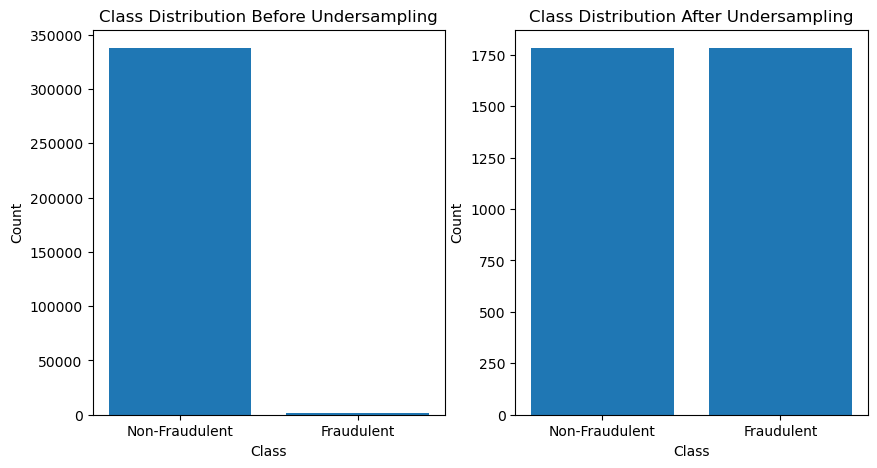

In [15]:
# Plot the counts of each class before and after undersampling
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(['Non-Fraudulent', 'Fraudulent'], [len(majority_class), len(minority_class)])
plt.title('Class Distribution Before Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(['Non-Fraudulent', 'Fraudulent'], [len(down_sampling), len(minority_class)])
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')

In [16]:
df.to_csv('preprocessed_data.csv', index=False)